# LABORATORIUM 6 - Model comparison
## Bartosz Więcek

In [1]:
from cmdstanpy import CmdStanModel
import seaborn as sns

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Excercise 1 - generate data.

In [2]:
model_1 = CmdStanModel(stan_file='code_1.stan')
N = int((7 + 6) * 100)
samples_1 = model_1.sample(data={"N": N})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)


chain 1 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▎       | 00:00 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:00 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:00 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:01 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:01 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:01 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:01 Iteration: 900 / 1000 [ 90%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                      
chain 2 |██████████| 00:01 Sampling completed
chain 3 |██████████| 0


INFO:cmdstanpy:CmdStan done processing.


In [3]:
df_1 = samples_1.draws_pd()
df_1

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.0,0.0,0.01,0.754950,-1.751870,-0.364937,-2.204650,-0.856609,-1.527000,0.989608,...,0.025476,-0.601005,-0.417100,0.095206,-1.496990,-0.547896,1.317230,-0.485383,-0.780316,-0.047651
1,0.0,0.0,0.01,0.231848,-0.708304,0.810188,0.525882,-1.811160,1.123110,-0.071976,...,-1.661690,0.066178,0.575485,0.501164,0.041222,-0.509161,-2.582550,1.397870,0.420971,1.479950
2,0.0,0.0,0.01,-0.201158,-0.878399,0.439365,0.914952,0.560042,-0.947213,-0.430755,...,-0.570524,0.036910,-0.762051,-0.491626,-0.293474,-0.444078,-0.193869,0.754617,-0.701577,-0.208720
3,0.0,0.0,0.01,-0.402838,0.276438,0.154637,0.496387,0.664820,1.109420,-0.003558,...,-0.564047,2.731720,2.251770,-1.700430,1.246370,1.383380,0.469760,1.012480,0.283190,0.215589
4,0.0,0.0,0.01,-0.816669,0.851635,0.613274,-1.364600,0.205485,-0.156065,0.037754,...,-1.173590,0.393058,-1.463980,-1.937300,0.522239,-0.662469,-0.875132,1.127820,-0.434128,0.325502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.01,-0.384028,0.336583,-0.277841,-1.006330,0.872278,1.239680,-0.921246,...,-0.546032,-0.337222,-0.663071,-0.736433,-0.235998,-1.472020,0.986463,-0.203857,1.672260,-0.561409
3996,0.0,0.0,0.01,0.569759,-0.824435,0.549123,0.779793,0.911639,0.458186,1.820420,...,-0.101598,-0.330917,-0.106120,-1.603030,0.727440,-0.667635,-0.099977,0.570148,0.575306,0.044117
3997,0.0,0.0,0.01,1.665510,-0.441080,-1.050880,-0.398450,-3.230010,-1.482600,1.042310,...,0.015232,0.104169,0.829852,0.308961,-0.086094,0.099860,0.669242,-2.115640,-0.086735,8.547080
3998,0.0,0.0,0.01,-0.126529,0.567890,-0.303620,-0.758136,0.141591,-0.701237,0.486932,...,0.737278,0.144071,-0.753886,0.131669,1.299210,1.079710,0.273863,-1.812910,-1.958130,-2.551540


In [4]:
model_2 = CmdStanModel(stan_file='code_2.stan')

samples_2 = model_2.sample(data={"N": N})

INFO:cmdstanpy:compiling stan file /home/Lab_6/code_2.stan to exe file /home/Lab_6/code_2
INFO:cmdstanpy:compiled model executable: /home/Lab_6/code_2
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)




chain 1 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█▊        | 00:01 Iteration: 200 / 1000 [ 20%]  (Sampling)
chain 1 |██▎       | 00:01 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:02 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:02 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:03 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:03 Iteration: 700 / 1000 [ 70%]  (Sampling)




chain 1 |████▌     | 00:04 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:04 Iteration: 900 / 1000 [ 90%]  (Sampling)
chain 1 |██████████| 00:04 Sampling completed                      
chain


INFO:cmdstanpy:CmdStan done processing.


In [5]:
df_2 = samples_2.draws_pd()
df_2

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.0,0.0,1.239870,-0.437633,0.034743,0.049170,-0.866207,1.045990,0.135259,0.514087,...,-0.189744,-1.025900,-3.689140,-0.424983,-4.136220,5.302400,0.761783,2.782760,1.726290,3.983550
1,0.0,0.0,-1.327250,-0.141057,1.825520,0.888793,-1.913060,-0.238592,-0.362997,0.449019,...,-0.048001,-0.880302,-3.052720,-0.087879,-4.028130,-1.484010,1.023170,-0.366102,2.166940,2.482640
2,0.0,0.0,1.496000,1.333600,-0.825741,-0.672591,0.625657,1.010120,0.082055,-1.303600,...,-0.014289,-0.563403,-2.201900,-2.594410,-1.858890,2.228390,-1.878580,-0.399670,-0.541287,1.109560
3,0.0,0.0,-0.769977,1.102030,0.798114,0.235745,2.140250,-0.093832,-1.510220,0.860471,...,1.996220,0.160598,-2.485340,2.373650,-3.592700,2.779120,-5.263930,0.875505,-3.467740,-0.577597
4,0.0,0.0,0.092837,-1.301120,-0.218805,-1.310400,-0.989286,1.075750,-0.521900,0.763526,...,-3.394370,0.497530,-0.926422,0.017655,1.780610,0.324502,-3.119380,0.701127,1.712520,1.987760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,-0.263868,0.676926,-1.039400,-0.518445,1.337520,-0.801653,-0.796328,-0.138201,...,0.536093,-0.961541,-1.728230,1.457110,-0.252293,-0.609735,-4.830580,-4.097410,-2.247930,-1.465540
3996,0.0,0.0,-0.776856,1.363890,-0.152316,-0.866047,0.184309,-1.046930,-0.853030,-1.668490,...,-5.321480,0.354131,-0.915284,-1.067360,-1.811980,-2.525030,1.112700,3.348270,0.315399,4.649150
3997,0.0,0.0,-0.048641,0.525534,0.496733,0.811385,0.131228,0.975276,-1.762590,-0.596800,...,1.125810,-3.876640,-4.076350,0.843854,2.484810,-3.813640,-4.998300,4.212200,1.816870,3.603770
3998,0.0,0.0,0.500290,0.740158,-0.777757,0.308005,-2.169180,-0.347247,0.644504,0.927176,...,4.082950,-2.041840,3.288880,-1.892240,-2.837910,1.054430,-2.731740,-1.792810,4.511270,0.240689


## Excercise 2 - compare normal and student models for data from first file

In [6]:
y_1 = [df_1[f'y[{i}]'][0] for i in range(1, N + 1)]
y_2 = [df_2[f'y[{i}]'][0] for i in range(1, N + 1)]

In [7]:
model_3 = CmdStanModel(stan_file='code_3.stan')
model_4 = CmdStanModel(stan_file='code_4.stan')

samples_3_1 = model_3.sample(data={"N": N, "y": y_1})
samples_4_1 = model_4.sample(data={"N": N, "y": y_1})

samples_3_2 = model_3.sample(data={"N": N, "y": y_2})
samples_4_2 = model_4.sample(data={"N": N, "y": y_2})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)




chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)





chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)







chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [9]:
comparisons = {}
for ic in ['loo', 'waic']:
    comparisons[ic] = az.compare(
        {'Normal': az.from_cmdstanpy(samples_3_1), 
         'Student': az.from_cmdstanpy(samples_4_1)},
        ic=ic)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.0454

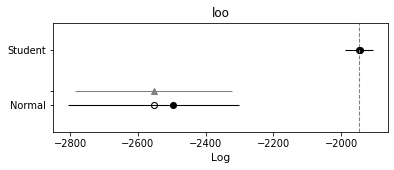

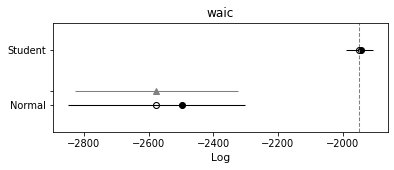

In [10]:
for ic, comparison in comparisons.items():
    az.plot_compare(comparison)
    plt.title(ic)
    plt.show()

Conclusion: Student model morks better in this case.

## Excercise 3 - compare models with different numbers of predictors

In [19]:
X_1 = np.array([df_2[f"X[{i},1]"] for i in range(1, N+1)])
X_ = np.array([df_2[f"X[{i},2]"] for i in range(1, N+1)])
X_2 = np.concatenate((X_1, X_), axis=0)
X_ = np.array([df_2[f"X[{i},3]"] for i in range(1, N+1)])
X_3 = np.concatenate((X_2, X_), axis=0)
y_1 = np.array(y_1)

In [23]:
model_5 =CmdStanModel(stan_file='code_5.stan')
samples_5_1 = model_5.sample(data={"N": N, 
                                   "y": y_1, 
                                   "K": 1, 
                                   "X": X_1[:,0].reshape(N,1)})
samples_5_2 = model_5.sample(data={"N": N, 
                                   "y": y_1, 
                                   "K": 2, 
                                   "X": X_2[:,0].reshape(N,2)})
samples_5_3 = model_5.sample(data={"N": N, 
                                   "y": y_1, 
                                   "K": 3, 
                                   "X": X_3[:,0].reshape(N,3)})

df_5_1 = samples_5_1.draws_pd()
df_5_2 = samples_5_2.draws_pd()
df_5_3 = samples_5_3.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing




























































































































































chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing






































































































































































































chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing






















































































































































chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [24]:
comparisons = {}
for ic in ['loo', 'waic']:
    comparisons[ic] = az.compare(
        {'K=1': az.from_cmdstanpy(samples_5_1), 
         'K=2': az.from_cmdstanpy(samples_5_2),
         'K=3': az.from_cmdstanpy(samples_5_3)},
        ic=ic)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

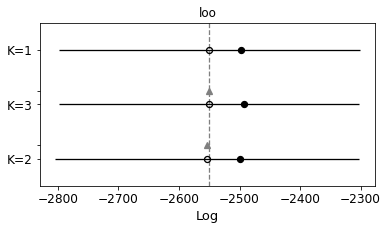

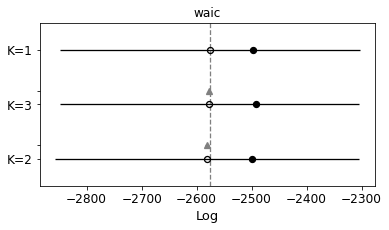

In [25]:
for ic, comparison in comparisons.items():
    az.plot_compare(comparison)
    plt.title(ic)
    plt.show()